In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
alpha_s = 1
tau_AMPA = 2 # ms
tau_NMDA = 50 # ms
tau_GABAA = 8 # ms

Q1 a). We are simulating the dynamical equation: \
$\frac{ds}{dt} = \alpha_s \sum_j \delta(t-t_j) - s/\tau_s $ \
Here, the dirac-delta function = 1 every-time there is a spike. \
Since, the spikes are periodic, we have the dirac-delta = 1, for integer multiple of time \
determined by the firing-rate. Evaluating this using Euler's method:

In [3]:
def fraction_open(T, r, alpha_s, s, del_t, tau_s):
    presynaptic_spike_train = np.zeros((len(T), 1))
    delay = 20 # ms
    for tt in range(len(T)-1):
        if np.mod(tt-delay, int(1000/r)) == 0:
            presynaptic_spike_train[tt] = 1
        del_s = (alpha_s * presynaptic_spike_train[tt]) - (s[tt] / tau_s)
        s[tt+1] = s[tt] + del_t * del_s
    return s

We can now simulate the dynamics for different firing-rates. For AMPA, $\tau_s = \tau_{AMPA} = 2 ms$. We can see that there is a peak in the fraction of synapse open each time there is a spike. Once the spike is gone, this fraction decays exponentially. The rate of the dynamics increases as a function of firing-rate.

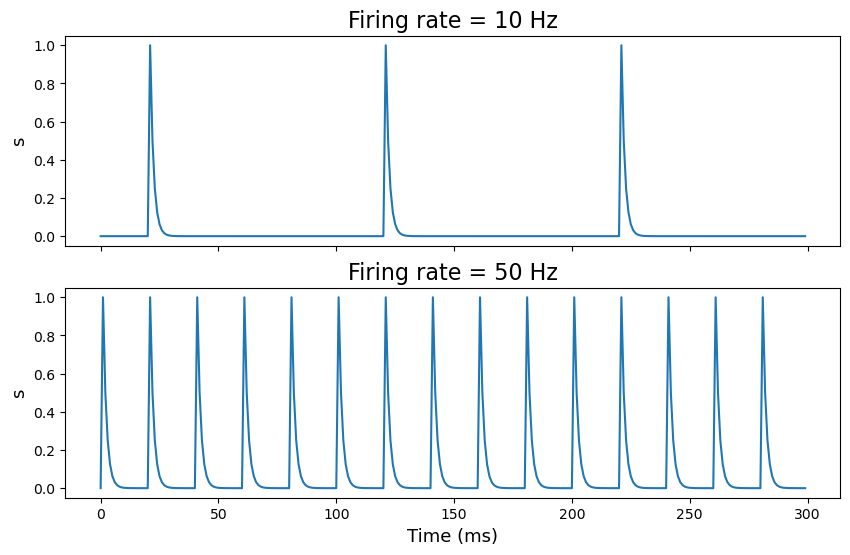

In [4]:
time_ub = 0.3 # seconds
del_t = 1
T = np.arange(0, time_ub*1000, del_t)
r1 = 10 # Hz
s1 = np.zeros((len(T), 1))
s1 = fraction_open(T, r1, alpha_s, s1, del_t, tau_AMPA)

r2 = 50 # Hz
s2 = np.zeros((len(T), 1))
s2 = fraction_open(T, r2, alpha_s, s2, del_t, tau_AMPA)

fig, axs = plt.subplots(2, 1, figsize = (10, 6), sharex = True)
axs[0].set_title(f'Firing rate = {r1} Hz', fontsize = 16)
axs[0].plot(T, s1)
axs[0].set_ylabel('s', fontsize = 13)
axs[1].set_title(f'Firing rate = {r2} Hz', fontsize = 16)
axs[1].plot(T, s2)
axs[1].set_xlabel('Time (ms)', fontsize = 13)
axs[1].set_ylabel('s', fontsize = 13)
plt.show()

In [5]:
time_ub = 100 # seconds
del_t = 1
T = np.arange(0, time_ub*1000, del_t)
r1 = 10 # Hz
s1 = np.zeros((len(T), 1))
s1 = fraction_open(T, r1, alpha_s, s1, del_t, tau_AMPA)
avg_s1 = np.sum(s1)/(time_ub*1000)
print(f'Average fraction of synapses open for {r1} Hz firing rate is {round(avg_s1, 2)}')

r2 = 50 # Hz
s2 = np.zeros((len(T), 1))
s2 = fraction_open(T, r2, alpha_s, s2, del_t, tau_AMPA)
avg_s2 = np.sum(s2)/(time_ub*1000)
print(f'Average fraction of synapses open for {r2} Hz firing rate is {round(avg_s2, 2)}')

Average fraction of synapses open for 10 Hz firing rate is 0.02
Average fraction of synapses open for 50 Hz firing rate is 0.1


We have the following dynamical equation: \
$\frac{ds}{dt} = \alpha_s \sum_j \delta(t-t_j) - s/\tau_s $ \
Now, when there is a spike, the second-term is zero and the first-term is $\alpha_s $ \
Hence, when there is a spike, $s(t) = \alpha_s , for\ t = 0$ \
Similarly, when there is no spike, the first-term is zero and the second-term is $ -s/\tau_s$ \
Thus, the dynamical equation becomes: \
$\frac{ds}{dt} = - s/\tau_s $ \
Hence, we have: \
$\frac{ds}{s} = - \frac{dt}{\tau_s} $ \
Integrating on both sides: \
$\int \frac{ds}{s} = - \int \frac{dt}{\tau_s} $ \
Therefore, \
$ln|s| = - \frac{t}{\tau_s}+C $ \
Therefore, \
$s(t) = e^{- \frac{t}{\tau_s}+C} $ \
Therefore, \
$s(t) = e^C e^{- \frac{t}{\tau_s}} = C^* e^{- \frac{t}{\tau_s}} $ \
For t = 0: \
$s(0) = C^* e^{- \frac{0}{\tau_s}} = C^*$ \
But at t = 0, we have a spike. Hence, $s(0) = \alpha_s $ \
Therefore, we have: \
$C^* = \alpha_s $ \
And the equation becomes: \
$s(t) = \alpha_s e^{- \frac{t}{\tau_s}}, for\ t > 0$ 

In [6]:
def analytical_s(T, r, alpha_s, tau_s):
    S_analytical = np.zeros((len(T), 1))
    delay = 20 #ms
    for tt in range(len(T)-1):
        if np.mod(tt-delay, int(1000/r)) == 0:
            S_analytical[tt] = alpha_s
        else:
            temp_tt = np.mod(tt-delay, int(1000/r))
            S_analytical[tt] = alpha_s* np.exp((-(temp_tt)/(tau_s)))
    return S_analytical

Plotting the analytical s, we can see that it matches the simulated s dynamics.

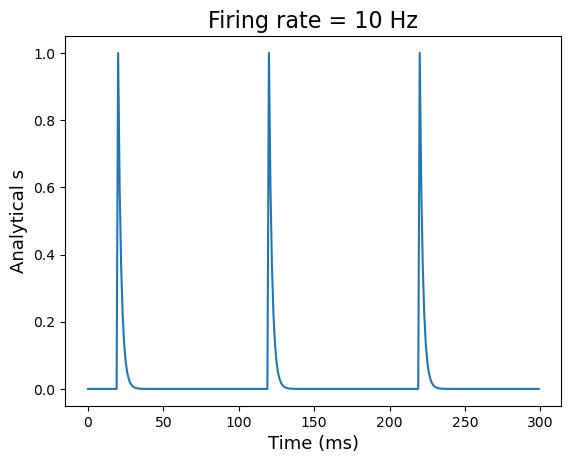

In [7]:
time_ub = 0.3 # seconds
del_t = 1
T = np.arange(0, time_ub*1000, del_t)
r1 = 10 # Hz
s1 = np.zeros((len(T), 1))
s1 = analytical_s(T, r1, alpha_s, tau_AMPA)
plt.title(f'Firing rate = {r1} Hz', fontsize = 16)
plt.xlabel('Time (ms)', fontsize = 13)
plt.ylabel('Analytical s', fontsize = 13)
plt.plot(T, s1)
plt.show()

Computing the analytical s, we can see it matches the simulated s very well.

In [8]:
time_ub = 100 # seconds
del_t = 1
T = np.arange(0, time_ub*1000, del_t)
r1 = 10 # Hz
s1 = np.zeros((len(T), 1))
s1 = analytical_s(T, r1, alpha_s, tau_AMPA)
avg_s1 = np.sum(s1)/(time_ub*1000)
print(f'Analytical average fraction of synapses open for {r1} Hz firing rate is {round(avg_s1, 2)}')

r2 = 50 # Hz
s2 = np.zeros((len(T), 1))
s2 = analytical_s(T, r2, alpha_s, tau_AMPA)
avg_s2 = np.sum(s2)/(time_ub*1000)
print(f'Analytical average fraction of synapses open for {r2} Hz firing rate is {round(avg_s2, 2)}')

Analytical average fraction of synapses open for 10 Hz firing rate is 0.03
Analytical average fraction of synapses open for 50 Hz firing rate is 0.13


Q2 a) We have: \
$\frac{ds}{dt} = \alpha_s r (1-s) - s/\tau_s $ \
Therefore, \
$\frac{ds}{dt} = \alpha_s r -\alpha_s r s - s/\tau_s $ \
Therefore, \
$\frac{ds}{dt} = \alpha_s r -s(\alpha_s r + 1/\tau_s) $ \
Therefore, \
$\frac{ds}{\alpha_s r -s(\alpha_s r + 1/\tau_s)} = dt $ \
Therefore, \
$\int \frac{ds}{\alpha_s r -s(\alpha_s r + 1/\tau_s)} = \int dt $ \
Therefore, \
$\frac{-1}{\alpha_s r + 1/\tau_s}ln|\alpha_s r -s(\alpha_s r + 1/\tau_s)| = t + C $ \
Therefore, \
$ln|\alpha_s r -s(\alpha_s r + 1/\tau_s)| = -(\alpha_s r + 1/\tau_s) * (t + C) $ \
Therefore, \
$ln|\alpha_s r -s(\alpha_s r + 1/\tau_s)| = -t(\alpha_s r + 1/\tau_s) + C^* $ \
Therefore, \
$\alpha_s r -s(\alpha_s r + 1/\tau_s) = e^{-t(\alpha_s r + 1/\tau_s) + C^*} $ \
Therefore, \
$\alpha_s r -s(\alpha_s r + 1/\tau_s) = C^{\alpha}e^{-t(\alpha_s r + 1/\tau_s) } $ \
Hence, the time-constant is: \
$\tau_{m} = \frac{1}{\alpha_s r + 1/\tau_s}$ \
Therefore, \
$\tau_{m} = \frac{\tau_s}{\alpha_s r \tau_s+ 1}$ 

In [9]:
def time_constant(alpha_s, r, tau_s):
    r_per_ms = r/1000
    tau_m = tau_s/(alpha_s * r_per_ms * tau_s + 1)
    return tau_m

r = 20 # Hz
tau_m_AMPA = time_constant(alpha_s, r, tau_AMPA)
tau_m_NMDA = time_constant(alpha_s, r, tau_NMDA)
tau_m_GABAA = time_constant(alpha_s, r, tau_GABAA)
print(f'Time constant of s dynamics for AMPA receptor is {round(tau_m_AMPA, 2)} ms')
print(f'Time constant of s dynamics for NMDA receptor is {round(tau_m_NMDA, 2)} ms')
print(f'Time constant of s dynamics for GABA receptor is {round(tau_m_GABAA, 2)} ms')

Time constant of s dynamics for AMPA receptor is 1.92 ms
Time constant of s dynamics for NMDA receptor is 25.0 ms
Time constant of s dynamics for GABA receptor is 6.9 ms


Q2 b) We have: \
$\frac{ds}{dt} = \alpha_s r (1-s) - s/\tau_s $ \
At steady-state, we have: \
$\frac{ds}{dt} = 0 $ \
Therefore, \
$\alpha_s r (1-s_{ss}) - s_{ss}/\tau_s = 0 $\
Therefore, \
$\alpha_s r -\alpha_s r s_{ss} - s_{ss}/\tau_s = 0 $\
Therefore, \
$\alpha_s r = \alpha_s r s_{ss} + s_{ss}/\tau_s $\
Therefore, \
$\alpha_s r = (\alpha_s r + 1/\tau_s) s_{ss} $\
Therefore, \
$\alpha_s r = \frac{\alpha_s \tau_s r + 1}{\tau_s} s_{ss} $\
Therefore, \
$s_{ss} = \frac{\alpha_s \tau_s r}{1 + \alpha_s \tau_s r} $

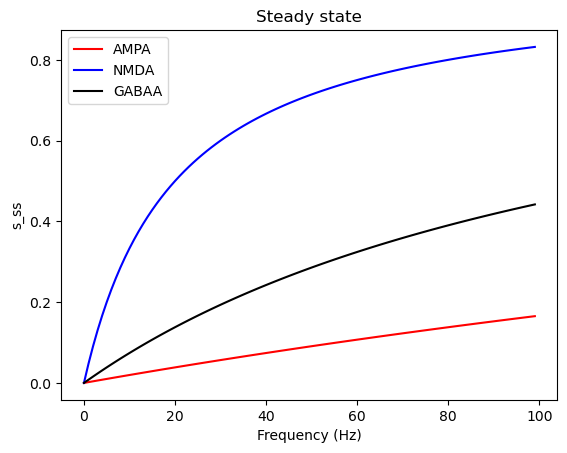

In [10]:
def s_steady(alpha_s, tau_s, r):
    r_per_ms = r/1000
    s_ss = (alpha_s * tau_s * r_per_ms)/(1 + alpha_s * tau_s * r_per_ms)
    return s_ss

r = np.arange(0, 100, 1)
S = np.zeros((3, len(r)))
for ii in range(len(r)):
    S[0, ii] = s_steady(alpha_s, tau_AMPA, r[ii])
    S[1, ii] = s_steady(alpha_s, tau_NMDA, r[ii])
    S[2, ii] = s_steady(alpha_s, tau_GABAA, r[ii])

plt.figure()
plt.plot(r, S[0, :], 'r', label = 'AMPA')
plt.plot(r, S[1, :], 'b', label = 'NMDA')
plt.plot(r, S[2, :], 'k', label = 'GABAA')
plt.xlabel('Frequency (Hz)')
plt.ylabel('s_ss')
plt.title('Steady state')
plt.legend()
plt.show()

We can see that the steady-sate s, increases linearly for AMPA because it has a small time-constant, and hence s does not approach s_max = 1 in this range. For GABAA with a slightly higher time-constant, we can see that steady-state s increases fast for lower frequencies and starts to slow down slightly for higher frequencies. For NMDA with a much higher time-constant, steady-state s increases rapidly for lower frequencies and starts to plateau after 40-50 Hz.

This makes sense physiologically as at a physiological firing-rate, NMDA synapses have the most activations, followed by GABAA to bring out necessary inhibition. AMPA is required for long-term plasticity and hence is less likely to be activated.